In [1]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset
dataset = pd.read_csv('/content/vgsales.csv.zip')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
dataset.head(10)

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

In [5]:
# Checking for null values in the dataset
dataset.isnull().values.any()

True

In [6]:
## Checking which columns contain null values
print(dataset['Rank'].isnull().values.any())
print(dataset['Name'].isnull().values.any())
print(dataset['Platform'].isnull().values.any())
print(dataset['Year'].isnull().values.any())
print(dataset['Genre'].isnull().values.any())
print(dataset['Publisher'].isnull().values.any())
print(dataset['NA_Sales'].isnull().values.any())
print(dataset['EU_Sales'].isnull().values.any())
print(dataset['JP_Sales'].isnull().values.any())
print(dataset['Other_Sales'].isnull().values.any())
print(dataset['Global_Sales'].isnull().values.any())

False
False
False
True
False
True
False
False
False
False
False


In [7]:
#Checking the number of missing value rows in the dataset
print(dataset['Year'].isnull().sum())
print(dataset['Publisher'].isnull().sum())

271
58


In [8]:
# Removing the missing value rows in the dataset
dataset = dataset.dropna(axis=0, subset=['Year','Publisher'])

In [9]:
dataset.isnull().values.any()

False

In [20]:
dataset.drop(['Name'], axis=1)

Rank Platform    Year         Genre   Publisher  NA_Sales  EU_Sales  \
0          1      Wii  2006.0        Sports    Nintendo     41.49     29.02   
1          2      NES  1985.0      Platform    Nintendo     29.08      3.58   
2          3      Wii  2008.0        Racing    Nintendo     15.85     12.88   
3          4      Wii  2009.0        Sports    Nintendo     15.75     11.01   
4          5       GB  1996.0  Role-Playing    Nintendo     11.27      8.89   
...      ...      ...     ...           ...         ...       ...       ...   
16593  16596      GBA  2002.0      Platform       Kemco      0.01      0.00   
16594  16597       GC  2003.0       Shooter  Infogrames      0.01      0.00   
16595  16598      PS2  2008.0        Racing  Activision      0.00      0.00   
16596  16599       DS  2010.0        Puzzle    7G//AMES      0.00      0.01   
16597  16600      GBA  2003.0      Platform     Wanadoo      0.01      0.00   

       JP_Sales  Other_Sales  Global_Sales  
0          3.77         8.46         82.74  
1          6.81         0.77         40.24  
2          3.79         3.31         35.82  
3          3.28         2.96         33.00  
4         10.22         1.00         31.37  
...         ...          ...           ...  
16593      0.00         0.00          0.01  
16594      0.00         0.00          0.01  
16595      0.00         0.00          0.01  
16596      0.00         0.00          0.01  
16597      0.00         0.00          0.01  

[16291 rows x 10 columns]

In [21]:
dataset.drop(['Platform'], axis=1)

Rank                                              Name    Year  \
0          1                                        Wii Sports  2006.0   
1          2                                 Super Mario Bros.  1985.0   
2          3                                    Mario Kart Wii  2008.0   
3          4                                 Wii Sports Resort  2009.0   
4          5                          Pokemon Red/Pokemon Blue  1996.0   
...      ...                                               ...     ...   
16593  16596                Woody Woodpecker in Crazy Castle 5  2002.0   
16594  16597                     Men in Black II: Alien Escape  2003.0   
16595  16598  SCORE International Baja 1000: The Official Game  2008.0   
16596  16599                                        Know How 2  2010.0   
16597  16600                                  Spirits & Spells  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16291 rows x 10 columns]

In [22]:
dataset.drop(['Genre'], axis=1)

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2006.0    Nintendo     41.49     29.02      3.77         8.46   
1      1985.0    Nintendo     29.08      3.58      6.81         0.77   
2      2008.0    Nintendo     15.85     12.88      3.79         3.31   
3      2009.0    Nintendo     15.75     11.01      3.28         2.96   
4      1996.0    Nintendo     11.27      8.89     10.22         1.00   
...       ...         ...       ...       ...       ...          ...   
16593  2002.0       Kemco      0.01      0.00      0.00         0.00   
16594  2003.0  Infogrames      0.01      0.00      0.00         0.00   
16595  2008.0  Activision      0.00      0.00      0.00         0.00   
16596  2010.0    7G//AMES      0.00      0.01      0.00         0.00   
16597  2003.0     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16291 rows x 10 columns]

In [27]:
dataset = dataset.drop(['Name','Platform','Genre','Publisher'], axis=1)

In [28]:
dataset.head()

Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1  2006.0     41.49     29.02      3.77         8.46         82.74
1     2  1985.0     29.08      3.58      6.81         0.77         40.24
2     3  2008.0     15.85     12.88      3.79         3.31         35.82
3     4  2009.0     15.75     11.01      3.28         2.96         33.00
4     5  1996.0     11.27      8.89     10.22         1.00         31.37

In [30]:
#Let's have all the features in X & target in Y
X = dataset.drop(columns='Global_Sales', axis=1)
y = dataset['Global_Sales']

In [31]:
X.shape

(16291, 6)

In [33]:
x_train = X.iloc[0:13032] # 80%
x_test = X.iloc[13032:] # 20%
y_train = y.iloc[0:13032] # 80%
y_test = y.iloc[13032:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13032, 6)
(3259, 6)
(13032,)
(3259,)


In [35]:
x_train.head(100)

Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      1  2006.0     41.49     29.02      3.77         8.46
1      2  1985.0     29.08      3.58      6.81         0.77
2      3  2008.0     15.85     12.88      3.79         3.31
3      4  2009.0     15.75     11.01      3.28         2.96
4      5  1996.0     11.27      8.89     10.22         1.00
..   ...     ...       ...       ...       ...          ...
95    96  1997.0      3.78      2.17      1.31         0.31
96    97  1988.0      5.39      1.18      0.70         0.19
97    98  2014.0      3.24      1.35      2.42         0.43
98    99  2008.0      4.79      1.90      0.00         0.69
99   100  2011.0      4.46      2.13      0.06         0.69

[100 rows x 6 columns]

In [36]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [37]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [38]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

LSTM starts

In [39]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [40]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [41]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [42]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 17s 31ms/step - loss: 0.9993 - root_mean_squared_error: 0.9996 - mean_absolute_error: 0.2935 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2366 - val_mean_absolute_error: 0.2312
Epoch 2/100
102/102 [==============================] - 1s 13ms/step - loss: 0.4369 - root_mean_squared_error: 0.6610 - mean_absolute_error: 0.1928 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041 - val_mean_absolute_error: 0.0845
Epoch 3/100
102/102 [==============================] - 1s 13ms/step - loss: 0.3390 - root_mean_squared_error: 0.5823 - mean_absolute_error: 0.1760 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1618 - val_mean_absolute_error: 0.1211
Epoch 4/100
102/102 [==============================] - 1s 13ms/step - loss: 0.3312 - root_mean_squared_error: 0.5755 - mean_absolute_error: 0.1650 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883 - val_mean_absolute_error: 0.0656
Epoch 5/100
102/102 [==========================

In [43]:
print(history.history)

{'loss': [0.9992684721946716, 0.4369488060474396, 0.33904072642326355, 0.33115753531455994, 0.40849849581718445, 0.24744868278503418, 0.28708845376968384, 0.2585931718349457, 0.24643512070178986, 0.2954261600971222, 0.2429259866476059, 0.25409767031669617, 0.2744905948638916, 0.23624710738658905, 0.2754105031490326, 0.26429158449172974, 0.22852785885334015, 0.19512642920017242], 'root_mean_squared_error': [0.9996341466903687, 0.6610210537910461, 0.5822720527648926, 0.5754628777503967, 0.6391388773918152, 0.4974421262741089, 0.5358063578605652, 0.5085205435752869, 0.49642232060432434, 0.5435311794281006, 0.49287521839141846, 0.5040810108184814, 0.5239185094833374, 0.48605257272720337, 0.524795651435852, 0.5140929818153381, 0.47804588079452515, 0.44173118472099304], 'mean_absolute_error': [0.2935405969619751, 0.1928301453590393, 0.17604289948940277, 0.16502486169338226, 0.21784275770187378, 0.13207723200321198, 0.15219736099243164, 0.12943369150161743, 0.14892582595348358, 0.168982401490

In [44]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

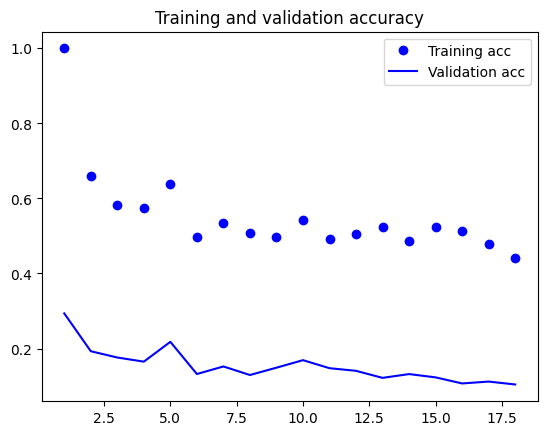

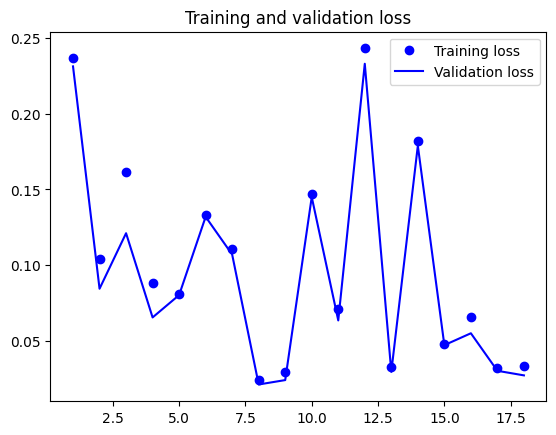

In [45]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

GRU

In [46]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import GRU
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [47]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(GRU(units=params["gru_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [48]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"gru_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [49]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [50]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 11s 24ms/step - loss: 0.7840 - root_mean_squared_error: 0.8854 - mean_absolute_error: 0.2731 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2123 - val_mean_absolute_error: 0.1828
Epoch 2/100
102/102 [==============================] - 1s 12ms/step - loss: 0.4678 - root_mean_squared_error: 0.6839 - mean_absolute_error: 0.2379 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537 - val_mean_absolute_error: 0.1296
Epoch 3/100
102/102 [==============================] - 1s 12ms/step - loss: 0.4007 - root_mean_squared_error: 0.6330 - mean_absolute_error: 0.1987 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229 - val_mean_absolute_error: 0.1074
Epoch 4/100
102/102 [==============================] - 1s 12ms/step - loss: 0.3804 - root_mean_squared_error: 0.6168 - mean_absolute_error: 0.2006 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208 - val_mean_absolute_error: 0.1080
Epoch 5/100
102/102 [==========================

In [51]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

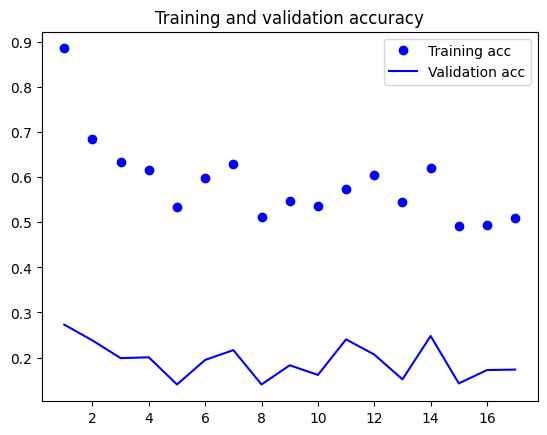

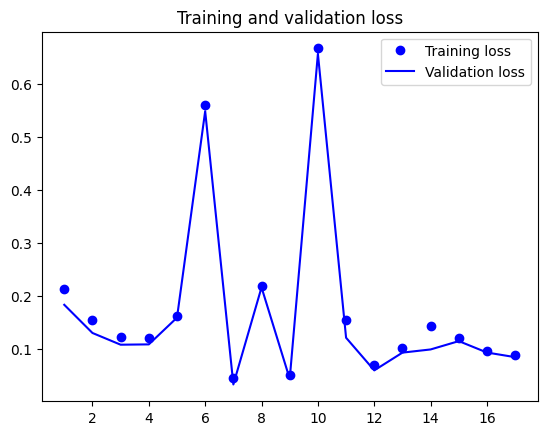

In [52]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

RNN

In [53]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [54]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [55]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [56]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [ ]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 11s 42ms/step - loss: 1.9166 - root_mean_squared_error: 1.3844 - mean_absolute_error: 0.6772 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600 - val_mean_absolute_error: 0.0401
Epoch 2/100
102/102 [==============================] - 4s 38ms/step - loss: 1.2168 - root_mean_squared_error: 1.1031 - mean_absolute_error: 0.5342 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3349 - val_mean_absolute_error: 0.3323
Epoch 3/100
102/102 [==============================] - 3s 32ms/step - loss: 1.1326 - root_mean_squared_error: 1.0642 - mean_absolute_error: 0.5409 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493 - val_mean_absolute_error: 0.1248
Epoch 4/100
102/102 [==============================] - 3s 32ms/step - loss: 1.0855 - root_mean_squared_error: 1.0419 - mean_absolute_error: 0.5092 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1037 - val_mean_absolute_error: 0.0956
Epoch 5/100
102/102 [==========================

In [ ]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

CNN

In [ ]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [ ]:
def CNN_model(params):
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, 1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=32,
                        strides=1, padding="causal",
                        activation="relu"),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1,activation = "linear")])
    #tf.keras.layers.Lambda(lambda x: x * 200)

  model.compile(loss=params["loss"],
              optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
  
  return model


params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = CNN_model(params)

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])


history_cnn = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

In [ ]:
root_mean_squared_error = history_cnn.history['root_mean_squared_error']
mean_absolute_error = history_cnn.history['mean_absolute_error']
val_loss = history_cnn.history['val_loss']
val_root_mean_squared_error = history_cnn.history['val_root_mean_squared_error']
val_mean_absolute_error = history_cnn.history['val_mean_absolute_error']

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()